In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
np.random.uniform(low=0.0, high=1.0)

0.41764116850004973

In [15]:
# generate a flip
def flip(num = 1):
    flips = []

    for i in range(num):
        num = np.random.uniform(low=0.0, high=1.0)
        if num > 0.5:
            flips.append("H")
        else:
            flips.append("T")

    return flips

In [26]:
flip(10)

['T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'T', 'T']

In [44]:
flips = flip(10)
print(flips)
value, counts = np.unique(flips, return_counts=True)
value, counts

['T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'H']


(array(['H', 'T'], dtype='<U1'), array([3, 7]))

### Rewrite above code in single cell

In [65]:
# generate a flip
def flip(num = 1):
    flips = []

    for i in range(num):
        num = np.random.uniform(low=0.0, high=1.0)
        if num > 0.5:
            flips.append("H")
        else:
            flips.append("T")

    return flips


flips = flip(10)
print(flips)
value, counts = np.unique(flips, return_counts=True)
print(value,counts)

['T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'T', 'T']
['H' 'T'] [4 6]


## Heisenbugs: A Deep Dive

### Introduction to Heisenbugs
- **Heisenbug**: A type of bug that behaves differently (or disappears) when you try to observe, debug, or trace it.
- **Origin**: Derived from the Heisenberg Uncertainty Principle in quantum mechanics.
  - **Principle**: You can't measure both position and velocity of a particle precisely at the same time.
  - Similarly, Heisenbugs "vanish" or change when closely monitored.
- **Characteristics**:
  - Difficult to diagnose and fix.
  - Hard to reproduce consistently.
  - Common in systems with timing, environmental conditions, or multi-threading.
- **Contexts**: 
  - Multi-threaded applications.
  - Random number generation.
  - Timing-sensitive operations.
  - Hardware interaction.
- **Key Feature**: **Intermittency** — may not occur the same way each time or may disappear during inspection.

### The Role of Timing and Debugging in Heisenbugs
- **Causes**: 
  - Interaction between **race conditions**, **multithreading**, **randomization**, and **debugging techniques**.
  - Timing-sensitive bugs, which can change behavior depending on system conditions and debugging tools.
- Example: Random number generation in a coin-flipping program.


#### **Introduction to Heisenbugs**
- **Heisenbug**: A software bug that behaves differently (or disappears) when you attempt to observe, debug, or trace it.
- **Derived from**: The Heisenberg Uncertainty Principle, which states that the act of observation affects the system being observed.
- **Characteristics**:
  - Difficult to reproduce consistently.
  - Appears or disappears depending on the environment or debugging tools used.

---

#### **Potential Heisenbug Scenarios in Coin-Flip Example**
- **Randomness**:
  - The sequence of heads and tails changes every time the program runs because of the randomness of the coin flips.
  - Makes it difficult to reproduce the exact behavior from one run to the next.
  
- **Debugging Randomness**:
  - Adding breakpoints or print statements can affect the timing of random number generation.
  - The sequence of flips might change due to the debugger’s interference with timing, resulting in a different distribution of heads and tails.

- **Intermittent Behavior**:
  - The program might run fine on one machine but behave differently when run under a debugger or in a different environment (e.g., different OS or hardware).
  - Randomness might be influenced by system factors like CPU load or memory, causing inconsistencies.

- **Timing Sensitivity**:
  - In more complex programs (e.g., involving multithreading), timing-sensitive bugs may emerge.
  - The order in which threads or processes execute can affect the outcome, causing behavior to change based on when and how the code is executed.

---

#### **Causes of Heisenbugs**
- **Randomization**:
  - Random number generation introduces unpredictability, and observing the system can trigger new random values, which may change the behavior.
  - Debugging (e.g., print statements or breakpoints) can alter the randomness and obscure the bug.

- **Multithreading and Concurrency**:
  - Heisenbugs often occur in multi-threaded environments due to **race conditions** (multiple threads trying to access shared resources in an unpredictable order).
  - Timing conditions and thread scheduling can affect the bug’s appearance, with debugging tools potentially altering thread execution order.

- **System and Environmental Factors**:
  - Environmental factors like **CPU load**, **memory usage**, **system clock timing**, or the **Python interpreter version** can influence the behavior of the program.
  - Heisenbugs may manifest only under specific system conditions or configurations.

- **Debugger Interference**:
  - Debuggers often pause execution, altering the program’s timing and flow, which can affect random number generation or thread scheduling.
  - This interference may cause the bug to disappear when debugging tools are used.

---

#### **How to Identify and Diagnose Heisenbugs**
- **Reproduce the Bug Consistently**:
  - Try to reproduce the issue under controlled conditions.
  - Use fixed **seed values** for random number generators to reduce unpredictability.
  - Run the program in a controlled environment (e.g., **virtual machine** or **container**).

- **Minimize Interference**:
  - Be mindful that debugging tools, print statements, or logging can interfere with the program's behavior.
  - Focus on observing the state of the system in a non-intrusive way (e.g., logging instead of using breakpoints).

- **Introduce Logging**:
  - Use extensive **logging** throughout the code to track system behavior.
  - This can help monitor the program’s state without disrupting execution or affecting timing.

- **Add Timing Controls**:
  - For timing-sensitive issues, introduce **delays** or synchronized access to shared resources to make the bug more predictable.
  - This can help reproduce and observe how timing affects the behavior.

- **Use Unit Testing and Stress Testing**:
  - Implement **automated unit tests** to repeatedly run the program under various conditions.
  - Perform **stress testing** with different inputs and workloads to catch bugs that only occur under specific conditions or loads.

### Predictable vs. Unpredictable Randomness

#### **Predictable Randomness**
- **Definition**: Random sequence is reproducible with the same initial conditions.
- **Characteristics**:
  - **Deterministic**: Same results with the same seed.
  - **Used in**: Testing, simulations, games.
- **Example**: 

  ```python
  import random
  random.seed(42)  # Fixed seed, same result every run
  print(random.randint(1, 100))  # Predictable output
  ```

- **Libraries**: `random.seed()` (Python).

#### **Unpredictable Randomness**
- **Definition**: Sequence cannot be predicted, even with the same initial conditions.
- **Characteristics**:
  - **Non-deterministic**: Varies each time.
  - **True randomness**: Influenced by external factors (e.g., hardware, noise).
- **Example**: 

  ```python
  import os
  random_value = os.urandom(16)  # Unpredictable random bytes
  print(random_value)
  ```

- **Use Cases**: Cryptography, security.

### Key Differences
| **Predictable**           | **Unpredictable**          |
|---------------------------|----------------------------|
| Reproducible with seed     | Non-reproducible           |
| Deterministic             | True randomness            |
| Used for testing, simulations | Used for security, cryptography |
```

### What is a Seed?

- **Seed**: A **seed** is an initial value that is used to start the random number generation process in a program.
- **Purpose**: It ensures that the sequence of random numbers is **predictable** and **reproducible** when the program is run multiple times.
- **Analogy**: Think of the seed as the starting point or "starting number" for a random process, like planting a seed to grow the same tree each time.
  
### How It Works:
- If you use the same seed value every time, the random number generator will produce the **same sequence** of random numbers each time.
- This is useful when you need to **repeat experiments** or **debug** your code, as the random values will always be the same when the seed is fixed.

### Example:
```python
import random

random.seed(42)  # Seed is 42
print(random.randint(1, 100))  # Always prints the same number when run with seed 42
```

- **Why Use a Seed?**: When debugging or testing, you might want **consistent results** even with randomness, so using a seed ensures you get the same output every time you run the program.

### What is Pseudorandomness?

- **Pseudorandomness** refers to numbers that **appear random** but are actually generated by a deterministic process (i.e., a set algorithm or formula).
- **Not truly random**: These numbers are not generated by natural, unpredictable phenomena (like atmospheric noise or radioactive decay). Instead, they are produced by an algorithm, which makes them **reproducible** if the starting point (the "seed") is the same.
- **Deterministic**: Given the same seed, the sequence of pseudorandom numbers will always be the same, which is why they are called "pseudorandom."

### Key Points:
- **Pseudorandom Numbers**: Numbers that **look random** but are generated by a specific algorithm.
- **Deterministic Process**: The process is predictable if you know the algorithm and the seed.
- **Why "Pseudo"?**: The prefix "pseudo" means "false" or "pretend" because, while the numbers behave randomly, they are ultimately predictable and not truly random.

### Example:
When you use `random.seed()` in Python, it generates pseudorandom numbers:
```python
import random

random.seed(10)  # Same seed = same result
print(random.randint(1, 100))  # Output is always the same with the same seed
```

In this case, the sequence of numbers is pseudorandom because it follows a deterministic pattern, but it appears random during execution.

## Probability of Flip Coins

In [66]:
from collections import Counter, defaultdict

def get_frequency(flips):
    keys = Counter(flips).keys()
    values = Counter(flips).values()

    # return dict(zip(keys,values)) # But what if there are no 'H' or no 'T'? KeyError

    return defaultdict(int, dict(zip(keys,values))) # The default dict will return the default value of that datatype when the doesn't exist




In [78]:
flips = flip(10)
frequency = get_frequency(flips=flips)
prob_Head = frequency['H'] / len(flips)


print(flips)
print(frequency)
print(prob_Head)


['T', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'T', 'T']
defaultdict(<class 'int'>, {'T': 7, 'H': 3})
0.3


## Experiment: Probability Calculated based on 1 flip to N flips

In [79]:
max_flips = 1000

probs = []

for num_flips in range(1,max_flips):
    flips = flip(num_flips)
    frequency = get_frequency(flips=flips)
    prob_head = frequency['H'] / len(flips)


    probs.append(prob_head)

In [81]:
print(frequency)

defaultdict(<class 'int'>, {'T': 479, 'H': 520})


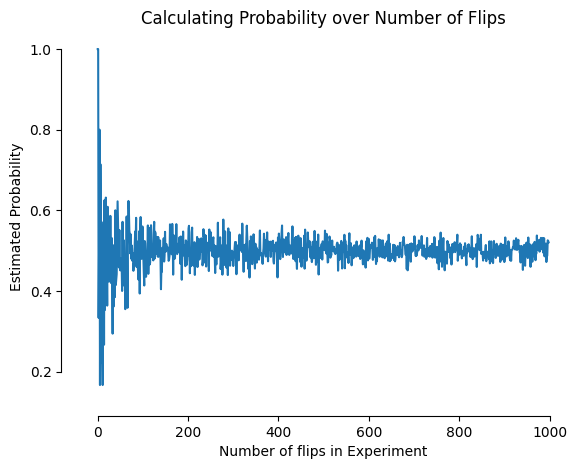

In [82]:
plt.plot(probs)
plt.xlabel("Number of flips in Experiment")
plt.ylabel("Estimated Probability")
plt.title("Calculating Probability over Number of Flips")

sns.despine(offset=10, trim=True) # Move axes away
plt.show()

## Bokeh

In [118]:
!pip install bokeh


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [119]:
#  1. Data

import numpy as np
import pandas as pd
df = pd.DataFrame(np.array([[33.9,4,65, 'US'], [32.4, 4, 66, 'Asia'], [21.4, 4, 109, 'Europe']]),
                     columns= ['mpg', 'cyl',   'hp',   'origin'],
                      index=['Toyota', 'Fiat', 'Volvo'])


from bokeh.models import ColumnDataSource
cds_df = ColumnDataSource(df)

In [120]:
# 2. Plotting

from bokeh.plotting import figure

# Create a figure with the correct attribute names
p1 = figure(width=300, tools='pan,box_zoom')  # use 'width' instead of 'plot_width'
p2 = figure(width=300, height=300, x_range=(0, 8), y_range=(0, 8))
p3 = figure()



In [1]:
from bokeh.plotting import figure, output_file, show

x = [1,2,3,4,5]
y = [2,4,6,8,10]

output_file('line.html')

fig = figure(title="Line plot example", x_axis_label="x", y_axis_label="y")

fig.line(x,y)
show(fig)